# Assignment 2

In [0]:
!pip install -q Keras #Update Keras Package Directly in Python Notebook
import keras #Import Keras Package to use further for Deep Learning

In [0]:
import numpy as np #Giving np as an alias to numpy to use the shortened name further
from keras.models import Sequential #Import Sequential from keras to create a model layer by layer. The Sequential is inherited from Keras models
from keras.layers import Flatten #Import Flatten which is inherited from Keras layers. Flatten helps to unroll the values from beginning to last
from keras.layers import Convolution2D #Import Convolution2D inherited from Keras layers. Usefull to filter the layers of 2D Images
from keras.utils import np_utils #Import np_utils inherited from Keras utils. Helps to conver array to a binary one hot vector
from keras.datasets import mnist #Import the mnist Dataset from Keras Database. mnist is a handwritten digit database

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Download mnist dataset and Assign Input, Output Variables for Train and Test datasets

(60000, 28, 28)


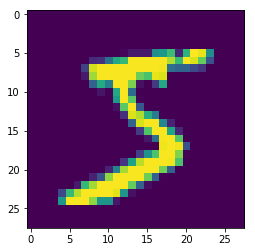

In [0]:
print(X_train.shape)#Print the shape/Dimension of input variables of the Train dataset
from matplotlib import pyplot as plt#Import pyplot inherited from matplotlib and give alias as plt. This will help us to plot and visulaise charts
%matplotlib inline 
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1) #Shape of train dataframe with 1st Dimension(Depth) and 28*28 Matrix with 1 feature
X_test = X_test.reshape(X_test.shape[0],28,28,1)#Shape of test dataframe with 1st Dimension(Depth) and 28*28 Matrix with 1 feature

In [0]:
X_train = X_train.astype('float32') #Change the data type to float
X_test = X_test.astype('float32') #Change the data type to float
X_train /= 255  # Normalise the data values to a range of [0,1]
X_test /= 255 # Normalise the data values to a range of [0,1]


In [0]:
y_train[:10] #First 10 elements of one dimensional y_train array

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10] #First 10 elements of 10 dimensional class array of Y_train

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, MaxPooling2D #Import Activation and MaxPooling2D from Keras layers

model = Sequential() #Sequential Modelling
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #Layer 1 Convolving the image with the 32 Kernels by 3*3 with activation function relu on 28*28 Pixel image RF:3*3 with one input channel
model.add(Convolution2D(64, 3, 3, activation='relu')) #Layer 2 Convolving the image with the 64 Kernels by 3*3 with activation function relu RF:5*5
model.add(Convolution2D(128, 3, 3, activation='relu')) #Layer 3 Convolving the image with the 128 Kernels by 3*3 with activation function relu RF:7*7

model.add(MaxPooling2D(pool_size=(2, 2))) #Create Maxpooling with 2*2 Convolution Kernel RF:8*8

model.add(Convolution2D(256, 3, 3, activation='relu')) #Layer 4 Convolving the image with the 256 Kernels by 3*3 with activation function relu RF:12*12
model.add(Convolution2D(512, 3, 3, activation='relu')) #Layer 5 Convolving the image with the 512 Kernels by 3*3 with activation function relu RF:16*16
model.add(Convolution2D(1024, 3, 3, activation='relu')) #Layer 6 Convolving the image with the 1024 Kernels by 3*3 with activation function relu RF:20*20
model.add(Convolution2D(2048, 3, 3, activation='relu')) #Layer 7 Convolving the image with the 2048 Kernels by 3*3 with activation function relu RF:24*24
model.add(Convolution2D(10, 3, 3, activation='relu')) #Layer 8 Convolving the image with the 10 Kernels by 3*3 with activation function relu RF:28*28

model.add(Flatten()) #Flatten the complete layer 
model.add(Activation('softmax')) #Activate and apply softmax to identify the probability of the identified channels in train or image

model.summary() #Gives you model summary

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

In [0]:
model.compile(loss='categorical_crossentropy', #Since we have one hot encoding here. We are using categorical cross entropy to calculate the loss function
             optimizer='adam', #Using adam optimiser as we require step wise optimiser in our excercise here
             metrics=['accuracy']) # Gives us an accuracy of the model

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1) #Fit model using the first argument as an numpy array for training data. Second argument as numpy array of test data. with batch size of 32 of 10 iterations with progressive bar per epoch

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.2763 - acc: 0.1125
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) #Evaluate the model on test data 

In [0]:
print(score) #Print the Evaluation score

[2.3025851249694824, 0.098]


In [0]:
y_pred = model.predict(X_test) #Predict on the Test data

In [0]:
print(y_pred[:9]) #Print Predicted Values
print(y_test[:9]) #Print Actual Values

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


##What is wrong with this model?

###Answer: The processing time taking for this one is more as we are using 25,348,362 parameters and the accuracy of the model is also low.